In [1]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
## Load Data
dfa = pd.read_csv("data/mllib/mall_customers.csv")
dfa = dfa[['Age','Annual Income (k$)']]
print('Total Row : ', len(dfa))

Total Row :  200


In [5]:
## Feature Scaling
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

In [6]:
## Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
labels = kmeans.labels_

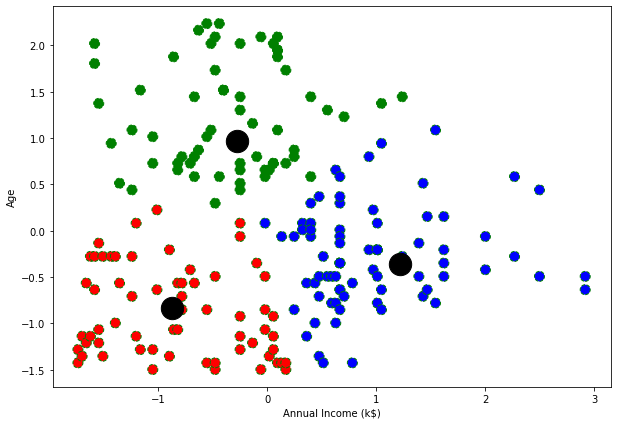

In [7]:
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
plt.show()